# Il sistema di Keyfitz-Kranzer

Consideriamo il seguente sistema
$$
\begin{cases}
  \partial_{t}\rho +\partial_{x} (\rho u)=0, & t >0, \, x \in \mathbb{R}
  \\
  \partial_{t} (\rho u) + \partial_{x} \left(\rho u (u + \frac{\mu}{\rho})\right)=a(t) \rho, & t>0, \ x \in \mathbb{R},
\end{cases}
$$
dove $\mu > 0$.

## Sistema omogeneo

In [9]:
import sympy as sp
from IPython.display import Markdown

In [10]:
# variabili
rho = sp.Symbol('\\rho', real=True, positive=True)
q = sp.Symbol('q', real=True)

# costante
mu = sp.Symbol('\\mu', real=True, positive=True)

In [11]:
# flusso
f1 = q
f2 = q * (q + mu) /rho
F = sp.Matrix([f1, f2])

# Matrice Jacobiana del flusso
DF = sp.simplify(F.jacobian([rho, q]))
display(Markdown(r"Matrice Jacobiana = ${}$".format(sp.latex(DF))))

Matrice Jacobiana = $\left[\begin{matrix}0 & 1\\- \frac{q \left(\mu + q\right)}{\rho^{2}} & \frac{\mu + 2 q}{\rho}\end{matrix}\right]$

In [12]:
# autovalori
((lam2,_,e2), (lam1,_,e1)) = DF.eigenvects()
lam1 = sp.simplify(lam1)
lam2 = sp.simplify(lam2)
display(Markdown(r"$\lambda_1 = {}$".format(sp.latex(sp.expand(lam1)))))
display(Markdown(r"$\lambda_2 = {}$".format(sp.latex(sp.expand(lam2)))))

$\lambda_1 = \frac{\mu}{\rho} + \frac{q}{\rho}$

$\lambda_2 = \frac{q}{\rho}$

## Cambio di variabili $\tilde u = u + \int_0^t a(s) ds$

Otteniamo il seguente sistema
$$
\begin{cases}
  \partial_{t}\rho +\partial_{x} (\rho (\tilde u + \int_0^t a(s) ds))=0, & t >0, \, x \in \mathbb{R}
  \\
  \partial_{t} (\rho \tilde u) + \partial_{x} \left(\rho \tilde u (\tilde u + \int_0^t a(s) ds + \mu \tilde u)\right)=0, & t>0, \ x \in \mathbb{R},
\end{cases}
$$
dove $\mu > 0$.

Usando la variabile $q = \rho \tilde u$ si ottiene il sistema nelle variabili conservate $(\rho, q)$:
$$
\begin{cases}
  \partial_{t}\rho +\partial_{x} (q + \rho \int_0^t a(s) ds)=0, & t >0, \, x \in \mathbb{R}
  \\
  \partial_{t} q + \partial_{x}\left(\frac{q^2}{\rho} + q \int_0^t a(s) ds + \mu \frac{q^2}{\rho} \right)=0, & t>0, \ x \in \mathbb{R},
\end{cases}
$$


### Campi caratteristici

Usiamo la funzione $A(t)$ per $\int_0^t a(s) ds$.

In [2]:
import sympy as sp
from IPython.display import Markdown

Introduciamo le variabili principali...

In [3]:
# variabili
rho = sp.Symbol('\\rho', real=True, positive=True)
q = sp.Symbol('q', real=True)
t = sp.Symbol('t', real=True)

# costante
mu = sp.Symbol('\\mu', real=True, positive=True)

# funzione
A = sp.Function('A')

...il campo vettoriale

In [4]:
# flusso
f1 = q + rho*A(t)
f2 = (1+mu)*q**2/rho + q*A(t)
F = sp.Matrix([f1, f2])

# Matrice Jacobiana del flusso
DF = sp.simplify(F.jacobian([rho, q]))
display(Markdown(r"Matrice Jacobiana = ${}$".format(sp.latex(DF))))

Matrice Jacobiana = $\left[\begin{matrix}A{\left(t \right)} & 1\\\frac{q^{2} \left(- \mu - 1\right)}{\rho^{2}} & \frac{\rho A{\left(t \right)} + 2 q \left(\mu + 1\right)}{\rho}\end{matrix}\right]$

... autovalori

In [5]:
# autovalori
((lam2,_,e2), (lam1,_,e1)) = DF.eigenvects()
lam1 = sp.simplify(lam1)
lam2 = sp.simplify(lam2)
display(Markdown(r"$\lambda_1 = {}$".format(sp.latex(sp.expand(lam1)))))
display(Markdown(r"$\lambda_2 = {}$".format(sp.latex(sp.expand(lam2)))))

$\lambda_1 = \frac{\sqrt{\mu} q \sqrt{\mu + 1}}{\rho} + \frac{\mu q}{\rho} + A{\left(t \right)} + \frac{q}{\rho}$

$\lambda_2 = - \frac{\sqrt{\mu} q \sqrt{\mu + 1}}{\rho} + \frac{\mu q}{\rho} + A{\left(t \right)} + \frac{q}{\rho}$

In [8]:
lam = sp.Symbol('lam', real=True)
p = DF.charpoly(lam)
display(p)

PurePoly(lam**2 + (-2*\mu*q - 2*\rho*A(t) - 2*q)/\rho*lam + (2*\mu*\rho*q*A(t) + \mu*q**2 + \rho**2*A(t)**2 + 2*\rho*q*A(t) + q**2)/\rho**2, lam, domain='ZZ(q,A(t),\mu,\rho)')

...autovettori

In [17]:
# autovettori
e1 = e1[0]
e2 = e2[0]
display(Markdown(r"$r_1 = {}$".format(sp.latex(e1))))
display(Markdown(r"$r_2 = {}$".format(sp.latex(e2))))


$r_1 = \left[\begin{matrix}\frac{\rho}{y}\\1\end{matrix}\right]$

$r_2 = \left[\begin{matrix}- \frac{1}{- \rho \frac{d}{d \rho} p{\left(\rho \right)} - \frac{y}{\rho}}\\1\end{matrix}\right]$

In [22]:
r1 = e1*y
r2 = sp.simplify(e2*(y/rho + rho*sp.diff(p(rho), rho)))
display(Markdown(r"$r_1 = {}$".format(sp.latex(r1))))
display(Markdown(r"$r_2 = {}$".format(sp.latex(r2))))

$r_1 = \left[\begin{matrix}\rho\\y\end{matrix}\right]$

$r_2 = \left[\begin{matrix}1\\\rho \frac{d}{d \rho} p{\left(\rho \right)} + \frac{y}{\rho}\end{matrix}\right]$

Mostriamo che $\nabla \lambda_1 \cdot r_1 >0$ e $\nabla \lambda_2 \cdot r_2 >0$. Qui la derivata seconda di $p$ è convessa!

In [24]:
field_1 = (lam1.diff(rho, 1) * r1[0] + lam1.diff(y, 1) * r1[1]).expand()
field_2 = (lam2.diff(rho, 1) * r2[0] + lam2.diff(y, 1) * r2[1]).expand()

display(Markdown(r"$\nabla \lambda_1 \cdot r_1 = {}$".format(sp.latex(field_1))))
display(Markdown(r"$\nabla \lambda_2 \cdot r_2 = {}$".format(sp.latex(field_2))))


$\nabla \lambda_1 \cdot r_1 = - \rho^{2} \frac{d^{2}}{d \rho^{2}} p{\left(\rho \right)} - 2 \rho \frac{d}{d \rho} p{\left(\rho \right)}$

$\nabla \lambda_2 \cdot r_2 = 0$

### Invarianti di Riemann

Gli invarianti di Riemann sono
$$
v_1 = \frac{q}{\rho} + \int_1^{\rho} \frac{\sqrt{p'(r)}}{r} dr
\qquad \textrm{ e } \qquad
v_2 = \frac{q}{\rho} - \int_1^{\rho} \frac{\sqrt{p'(r)}}{r} dr.
$$

In [31]:
# variable for the integrals
rr = sp.Symbol('r', real=True, positive=True)

# Riemann invariants
v_1 = q/rho + sp.Integral(sp.sqrt(p(rr).diff(rr))/rr, (rr, 1, rho))
v_2 = q/rho - sp.Integral(sp.sqrt(p(rr).diff(rr))/rr, (rr, 1, rho))

display(Markdown(r"$v_1 = {}$".format(sp.latex(v_1))))
display(Markdown(r"$v_2 = {}$".format(sp.latex(v_2))))

$v_1 = \int\limits_{1}^{\rho} \frac{\sqrt{\frac{d}{d r} p{\left(r \right)}}}{r}\, dr + \frac{q}{\rho}$

$v_2 = - \int\limits_{1}^{\rho} \frac{\sqrt{\frac{d}{d r} p{\left(r \right)}}}{r}\, dr + \frac{q}{\rho}$

Verifichiamo che $\nabla v_1 \cdot r_1 = 0$ e che $\nabla v_2 \cdot r_2 = 0$.

In [33]:
grad_v_1 = sp.Matrix([v_1]).jacobian([rho, q])
grad_v_2 = sp.Matrix([v_2]).jacobian([rho, q])

assert sp.simplify(sp.MatMul(grad_v_1, r1).doit()[0]) == 0
assert sp.simplify(sp.MatMul(grad_v_2, r2).doit()[0]) == 0

In [40]:
v1_r2 = sp.simplify(sp.MatMul(grad_v_1, r2).doit()[0])
v2_r1 = sp.simplify(sp.MatMul(grad_v_1, r2).doit()[0])

display(Markdown(r"$\nabla v_1 \cdot r_2 = {}$".format(sp.latex(v1_r2))))
display(Markdown(r"$\nabla v_2 \cdot r_1 = {}$".format(sp.latex(v2_r1))))

$\nabla v_1 \cdot r_2 = 2 \sqrt{\frac{d}{d \rho} p{\left(\rho \right)}}$

$\nabla v_2 \cdot r_1 = 2 \sqrt{\frac{d}{d \rho} p{\left(\rho \right)}}$

## Caso con pressione $p(\rho) = k \rho^{\gamma}$

Consideriamo il termine di pressione $p(\rho) = k \rho^\gamma$ con $k > 0$ e $\gamma > 1$.

In [ ]:
# Pressione
k = sp.Symbol('k', real=True, positive=True)
gamma = sp.Symbol('\\gamma', real=True, positive=True)

In [3]:
# Constants
rho_0 = sp.Symbol('\\rho_0', real=True, positive=True)
q_0 = sp.Symbol('q_0', real=True)

## Matrice Jacobiana, autovalori e autovettori
La matrice Jacobiana del flusso è
$$
  \left[\begin{matrix}0 & 1\\\frac{\gamma \rho^{\gamma} k}{\rho} - \frac{q^{2}}{\rho^{2}} & \frac{2 q}{\rho}\end{matrix}\right]
$$
Gli autovalori sono
$$
  \lambda_1 = - \frac{\sqrt{\gamma} \rho^{\frac{\gamma}{2}} \sqrt{k}}{\sqrt{\rho}} + \frac{q}{\rho}
  \qquad \textrm{ e } \qquad
  \lambda_2 = \frac{\sqrt{\gamma} \rho^{\frac{\gamma}{2}} \sqrt{k}}{\sqrt{\rho}} + \frac{q}{\rho}.
$$
Gli autovettori sono
$$
  r_1 = \left[\begin{matrix}\frac{\rho^{2}}{- \sqrt{\gamma} \rho^{\frac{3}{2}} \rho^{\frac{\gamma}{2}} \sqrt{k} + \rho q}\\1\end{matrix}\right]
  \qquad \textrm{ e } \qquad
  r_2 = \left[\begin{matrix}\frac{\rho^{2}}{\sqrt{\gamma} \rho^{\frac{3}{2}} \rho^{\frac{\gamma}{2}} \sqrt{k} + \rho q}\\1\end{matrix}\right].
$$

In [18]:
# pressure law
p = k * rho**gamma

# flusso
f1 = q
f2 = q**2/rho + p
F = sp.Matrix([f1, f2])

# Matrice Jacobiana del flusso
DF = F.jacobian([rho, q])

# autovalori
((lam1,_,e1), (lam2,_,e2)) = DF.eigenvects()
lam1 = sp.simplify(lam1)
lam2 = sp.simplify(lam2)
c = lam2 - q/rho
e1 = e1[0]
e2 = e2[0]
display(Markdown(r"Matrice Jacobiana = ${}$".format(sp.latex(DF))))
display(Markdown(r"$\lambda_1 = {}$".format(sp.latex(lam1))))
display(Markdown(r"$\lambda_2 = {}$".format(sp.latex(lam2))))
display(Markdown(r"$r_1 = {}$".format(sp.latex(e1))))
display(Markdown(r"$r_2 = {}$".format(sp.latex(e2))))

Matrice Jacobiana = $\left[\begin{matrix}0 & 1\\\frac{\gamma \rho^{\gamma} k}{\rho} - \frac{q^{2}}{\rho^{2}} & \frac{2 q}{\rho}\end{matrix}\right]$

$\lambda_1 = - \frac{\sqrt{\gamma} \rho^{\frac{\gamma}{2}} \sqrt{k}}{\sqrt{\rho}} + \frac{q}{\rho}$

$\lambda_2 = \frac{\sqrt{\gamma} \rho^{\frac{\gamma}{2}} \sqrt{k}}{\sqrt{\rho}} + \frac{q}{\rho}$

$r_1 = \left[\begin{matrix}\frac{\rho^{2}}{- \sqrt{\gamma} \rho^{\frac{3}{2}} \rho^{\frac{\gamma}{2}} \sqrt{k} + \rho q}\\1\end{matrix}\right]$

$r_2 = \left[\begin{matrix}\frac{\rho^{2}}{\sqrt{\gamma} \rho^{\frac{3}{2}} \rho^{\frac{\gamma}{2}} \sqrt{k} + \rho q}\\1\end{matrix}\right]$

In [19]:
field_1 = lam1.diff(rho, 1) * e1[0] + lam1.diff(q, 1) * e1[1]

display(Markdown(r"$\nabla \lambda_1 \cdot r_1 = {}$".format(sp.latex(field_1))))


$\nabla \lambda_1 \cdot r_1 = \frac{\rho^{2} \left(- \frac{\gamma^{\frac{3}{2}} \rho^{\frac{\gamma}{2}} \sqrt{k}}{2 \rho^{\frac{3}{2}}} + \frac{\sqrt{\gamma} \rho^{\frac{\gamma}{2}} \sqrt{k}}{2 \rho^{\frac{3}{2}}} - \frac{q}{\rho^{2}}\right)}{- \sqrt{\gamma} \rho^{\frac{3}{2}} \rho^{\frac{\gamma}{2}} \sqrt{k} + \rho q} + \frac{1}{\rho}$

## Curve di rarefazione
Le curve di rarefazione sono
$$
  R_1 = - \rho \left(2 \sqrt{2} \sqrt{\rho} \sqrt{k} - 2 \sqrt{2} \sqrt{\rho_{0}} \sqrt{k}\right) + \frac{\rho q_{0}}{\rho_{0}}
  \qquad \textrm{ e } \qquad
  R_2 =  \rho \left(2 \sqrt{2} \sqrt{\rho} \sqrt{k} - 2 \sqrt{2} \sqrt{\rho_{0}} \sqrt{k}\right) + \frac{\rho q_{0}}{\rho_{0}}
$$

In [ ]:
# Curve di rarefazione

ii = sp.integrate((c/rho).subs(rho, ss), (ss, rho_0, rho))

R_1 = rho*q_0/rho_0 - rho*ii
R_2 = rho*q_0/rho_0 + rho*ii

print(sp.latex(R_1), " eeee ", sp.latex(R_2))

- \rho \left(2 \sqrt{2} \sqrt{\rho} \sqrt{k} - 2 \sqrt{2} \sqrt{\rho_{0}} \sqrt{k}\right) + \frac{\rho q_{0}}{\rho_{0}}  eeee  \rho \left(2 \sqrt{2} \sqrt{\rho} \sqrt{k} - 2 \sqrt{2} \sqrt{\rho_{0}} \sqrt{k}\right) + \frac{\rho q_{0}}{\rho_{0}}


## Curve di shock
Curve di shock
$$
  - \frac{\sqrt{\rho} \sqrt{\left(\rho - \rho_{0}\right) \left(\rho^{2} k - \rho_{0}^{2} k\right)}}{\sqrt{\rho_{0}}} + \frac{\rho q_{0}}{\rho_{0}}
$$

In [ ]:
# Curve di shock

S_1 = rho*q_0/rho_0 - sp.sqrt(rho*(rho-rho_0)*(p - p.subs(rho, rho_0))/rho_0)
S_2 = S_1

print(sp.latex(S_1))

- \frac{\sqrt{\rho} \sqrt{\left(\rho - \rho_{0}\right) \left(\rho^{2} k - \rho_{0}^{2} k\right)}}{\sqrt{\rho_{0}}} + \frac{\rho q_{0}}{\rho_{0}}


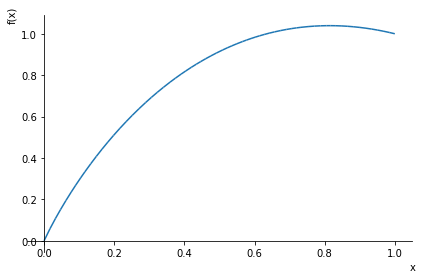

In [ ]:
# Plot delle curve di lax
rho_00, q_00 = sp.S(1), sp.S(1)
kk = sp.S(1)
xx = 2

# sp.plot((R_1.subs(rho_0, rho_00).subs(q_0, q_00).subs(k, kk), (rho, 0, rho_00)),
#         (R_2.subs(rho_0, rho_00).subs(q_0, q_00).subs(k, kk), (rho, rho_00, xx)),
#         (S_1.subs(rho_0, rho_00).subs(q_0, q_00).subs(k, kk), (rho, rho_00, xx)),
#         (S_2.subs(rho_0, rho_00).subs(q_0, q_00).subs(k, kk), (rho, 0, rho_00)))

sp.plot((R_1.subs(rho_0, rho_00).subs(q_0, q_00).subs(k, kk), (rho, 0, rho_00)))


## Invarianti di Riemann
Gli invarianti di Riemann sono
$$
v_1 = \frac{q}{\rho} + \frac{2}{\gamma - 1} \sqrt{k \gamma} \rho^{\frac{\gamma - 1}{2}}
\qquad \textrm{ e } \qquad
v_2 = \frac{q}{\rho} - \frac{2}{\gamma - 1} \sqrt{k \gamma} \rho^{\frac{\gamma - 1}{2}}
$$
Verifichiamo che $\nabla v_1 \cdot r_1 = 0$ e che $\nabla v_2 \cdot r_2 = 0$.

In [ ]:
# Riemann invariants

v_1 = q/rho + 2*sp.sqrt(k*gamma)*rho**((gamma-1)/2)/(gamma-1)
v_2 = q/rho - 2*sp.sqrt(k*gamma)*rho**((gamma-1)/2)/(gamma-1)

grad_v_1 = sp.Matrix([v_1]).jacobian([rho, q])
grad_v_2 = sp.Matrix([v_2]).jacobian([rho, q])

assert sp.simplify(sp.MatMul(grad_v_1, e1).doit()[0]) == 0
assert sp.simplify(sp.MatMul(grad_v_2, e2).doit()[0]) == 0

Di conseguenza **$v_1$ è costante lungo le curve di rarefazione della prima famiglia**, mentre **$v_2$ è costante lungo le curve di rarefazione della seconda famiglia**.

In [ ]:
v1_su_R1 = sp.simplify(v_1.subs(q, R_1))
v2_su_R2 = sp.simplify(v_2.subs(q, R_2))

print(v1_su_R1)
print(v2_su_R2)

# non dipendono da rho
assert rho not in v1_su_R1.free_symbols
assert rho not in v2_su_R2.free_symbols



(2*sqrt(2)*\rho_0**(3/2)*sqrt(k) + q_0)/\rho_0
(-2*sqrt(2)*\rho_0**(3/2)*sqrt(k) + q_0)/\rho_0


In [ ]:
v1_su_R2 = sp.simplify(v_1.subs(q, R_2))
v2_su_R1 = sp.simplify(v_2.subs(q, R_1))

print(v1_su_R2)
print(v2_su_R1)

# dipendono da rho
assert rho in v1_su_R2.free_symbols
assert rho in v2_su_R1.free_symbols

4*sqrt(2)*sqrt(\rho)*sqrt(k) - 2*sqrt(2)*sqrt(\rho_0)*sqrt(k) + q_0/\rho_0
-4*sqrt(2)*sqrt(\rho)*sqrt(k) + 2*sqrt(2)*sqrt(\rho_0)*sqrt(k) + q_0/\rho_0


In [ ]:
# condizione per la funzione implicita (deve essere diversa da 0)
sp.simplify(sp.MatMul(grad_v_2, e1).doit()[0])

-2*sqrt(2)*\rho**3*sqrt(k)/(\rho**(5/2)*q - sqrt(2)*\rho**4*sqrt(k))

In [ ]:
l1_R1 = lam1.subs(q, R_1)
l1_r0 = lam1.subs(q, q_0).subs(rho, rho_0)

eq = l1_R1 - l1_r0 - sigma

sol = sp.solveset(eq, rho)

print(sol)

# non riesce a risolvere l'equazione!


Complement(ConditionSet(\rho, Eq(-sqrt(2)*\rho**(3/2)*\rho_0*sqrt(k) - \rho*\rho_0*\sigma - 2*sqrt(2)*\rho*\rho_0*sqrt(k)*(sqrt(\rho) - sqrt(\rho_0)) + \rho*q_0 - \rho*(-sqrt(2)*\rho_0**(3/2)*sqrt(k) + q_0), 0), Complexes), FiniteSet(0))


Mostriamo che

In [ ]:
# test

RI_1_00 = RI_1.subs(rho, rho_00).subs(q, q_00).subs(k, kk)

# on the Rarefaction
tmp_1 = RI_1.subs(q, R_1)
tmp_2 = tmp_1.subs(k, kk).subs(rho_0, rho_00).subs(q_0, q_00)

sp.simplify(tmp_2)
sp.simplify(RI_1_00)

#sp.plot(tmp_2, (rho, 0, rho_00))

# on the shock (l'invariante non è costante!)
tmp_3 = RI_1.subs(q, S_1)
tmp_4 = tmp_3.subs(k, kk).subs(rho_0, rho_00).subs(q_0, q_00)

sp.simplify(tmp_4)

sp.plot(tmp_4, (rho, rho_00, 4))


NameError: ignored

## Energia e flusso di energia

L'energia è
$$
E = \frac{q^2}{2 \rho} + \rho \int_1^\rho \frac{p(r)}{r^2} dr.
$$
Il flusso di energia è
$$
F = \frac{q}{\rho} (E + p(\rho))
$$

Verifichiamo che (formalmente)
$$
\partial_t E + \partial_x F = 0
$$

In [27]:
p = sp.Function('p')
r = sp.Symbol('r')
t = sp.Symbol('t')
x = sp.Symbol('x')
rho = sp.Function('rho')
q = sp.Function('q')

E = q(t,x)*q(t,x)/(2*rho(t,x)) + rho(t,x) * sp.Integral(p(r)/r**2, (r, 1, rho(t,x)))
F = q(t,x)*(E + p(rho(t,x)))/ rho(t,x)
P_1 = q(t, x) / rho(t,x) +p(rho(t, x))

In [52]:
E

q(t, x)**2/(2*rho(t, x)) + rho(t, x)*Integral(p(r)/r**2, (r, 1, rho(t, x)))

In [53]:
F

(p(rho(t, x)) + q(t, x)**2/(2*rho(t, x)) + rho(t, x)*Integral(p(r)/r**2, (r, 1, rho(t, x))))*q(t, x)/rho(t, x)

In [23]:
E_t = E.diff(t)
F_x = F.diff(x)

In [54]:
E_t

p(rho(t, x))*Derivative(rho(t, x), t)/rho(t, x) - q(t, x)**2*Derivative(rho(t, x), t)/(2*rho(t, x)**2) + q(t, x)*Derivative(q(t, x), t)/rho(t, x) + Derivative(rho(t, x), t)*Integral(p(r)/r**2, (r, 1, rho(t, x)))

In [65]:
F_x

-(p(rho(t, x)) + q(t, x)**2/(2*rho(t, x)) + rho(t, x)*Integral(p(r)/r**2, (r, 1, rho(t, x))))*q(t, x)*Derivative(rho(t, x), x)/rho(t, x)**2 + (p(rho(t, x)) + q(t, x)**2/(2*rho(t, x)) + rho(t, x)*Integral(p(r)/r**2, (r, 1, rho(t, x))))*Derivative(q(t, x), x)/rho(t, x) + (p(rho(t, x))*Derivative(rho(t, x), x)/rho(t, x) - q(t, x)**2*Derivative(rho(t, x), x)/(2*rho(t, x)**2) + q(t, x)*Derivative(q(t, x), x)/rho(t, x) + Derivative(p(rho(t, x)), rho(t, x))*Derivative(rho(t, x), x) + Derivative(rho(t, x), x)*Integral(p(r)/r**2, (r, 1, rho(t, x))))*q(t, x)/rho(t, x)

In [62]:
E_t_sub1 = E_t.subs(sp.Derivative(rho(t, x), t), -sp.Derivative(q(t,x), x)).expand()

In [63]:
E_t_sub1

-p(rho(t, x))*Derivative(q(t, x), x)/rho(t, x) + q(t, x)**2*Derivative(q(t, x), x)/(2*rho(t, x)**2) + q(t, x)*Derivative(q(t, x), t)/rho(t, x) - Derivative(q(t, x), x)*Integral(p(r)/r**2, (r, 1, rho(t, x)))

In [64]:
term = sp.expand(E_t_sub1 + F_x)

term

-q(t, x)**3*Derivative(rho(t, x), x)/rho(t, x)**3 + 2*q(t, x)**2*Derivative(q(t, x), x)/rho(t, x)**2 + q(t, x)*Derivative(p(rho(t, x)), rho(t, x))*Derivative(rho(t, x), x)/rho(t, x) + q(t, x)*Derivative(q(t, x), t)/rho(t, x)

In [68]:
term2 = term.subs(sp.Derivative(q(t, x), t), -sp.Derivative(P_1, x)).expand()

In [71]:
term2

-q(t, x)**3*Derivative(rho(t, x), x)/rho(t, x)**3 + 2*q(t, x)**2*Derivative(q(t, x), x)/rho(t, x)**2 - q(t, x)*Derivative(p(rho(t, x)) + q(t, x)/rho(t, x), x)/rho(t, x) + q(t, x)*Derivative(p(rho(t, x)), rho(t, x))*Derivative(rho(t, x), x)/rho(t, x)